In [411]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import randrange
from numpy.linalg import eig
import warnings
import pandas as pd

# Leaves

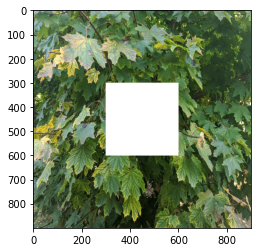

In [1128]:
img = mpimg.imread('Leaves_Masked.jpg')
plt.imshow(img)

## Neural Network

**Lowering the Number of Pixels in the Image**

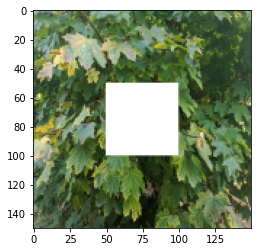

In [1129]:
image = []
image2 = []
#Lowering the number of rows by a factor of 6
for i in range(151):
    row = []
    if i == 0:
        continue
    #Lowering the number of columns by a factor of 6
    for j in range(151):
        if j == 0:
            continue
        
        #Setting each color as average of 36 pixel region
        red = np.mean(img[(6*(i-1)):6*i,(6*(j-1)):6*j,0])
        green = np.mean(img[(6*(i-1)):6*i,(6*(j-1)):6*j,1])
        blue = np.mean(img[(6*(i-1)):6*i,(6*(j-1)):6*j,2])
        colors = [red,green,blue]
        row.append(colors)
    image.append(row)
    image2.append(row)

image = np.array(image)
image = image.astype(int)

image2 = np.array(image2)
image2 = image2.astype(int)

plt.imshow(image)

**Creating the Training Data**

In [1130]:
neuralX = []
#Each Y color in separate model
neuralYred = []
neuralYgreen = []
neuralYblue = []
for i in range(150):
    #Training Data does not include top squares
    if i <= 50:
        continue
    for j in range(150):
        if j == 0:
            continue
        
        #Training data does not include middle square
        if i >= 50 and i <= 101 and j >= 50 and j <= 101:
            continue
        
        #Dividing by 255 so that neural network functions more easily. To be adjusted later
        redX = image[i,j,0]/255
        greenX = image[i,j,1]/255
        blueX = image[i,j,2]/255
        colorsX = [redX,greenX,blueX]
        
        #Y values are from the row above the X values
        redY = [image[i-1,j,0]/255]
        greenY = [image[i-1,j,1]/255]
        blueY = [image[i-1,j,2]/255]
        
        #Add the values to X and Y values
        neuralX.append(colorsX)
        neuralYred.append(redY)
        neuralYgreen.append(greenY)
        neuralYblue.append(blueY)

neuralX = np.array(neuralX)

neuralYred = np.array(neuralYred)
neuralYgreen = np.array(neuralYgreen)
neuralYblue = np.array(neuralYblue)

**Model for red values**

In [1131]:
redWeights = np.random.random((3,1))
print(redWeights)
for i in range(10000):
    #z values
    z = np.dot(neuralX,redWeights)
    #tanh formula
    sig1 = np.exp(z)
    sig2 = np.exp(-z)
    tanh = (sig1 - sig2)/(sig1 + sig2)
    #error
    err = neuralYred - tanh
    #Derivative of tanh
    deriv = tanh * (1 - tanh)
    #Adjust the weights
    mult = err*deriv
    adjust = np.dot(neuralX.T, mult)/12500
    redWeights = redWeights + adjust
    #if weights are out of range, set them to be between 0 and 1
    for j in range(3):
        if redWeights[j] > 1:
            redWeights[j] = 1
        if redWeights[j] < -1:
            redWeights[j] = -1
print(redWeights)

[[0.17360712]
 [0.81402952]
 [0.97355476]]
[[1.        ]
 [0.02572808]
 [0.02288943]]


**Model for green values**

In [1132]:
greenWeights = np.random.random((3,1))
print(greenWeights)
for i in range(10000):
    #z values
    z = np.dot(neuralX,greenWeights)
    #tanh formula
    sig1 = np.exp(z)
    sig2 = np.exp(-z)
    tanh = (sig1 - sig2)/(sig1 + sig2)
    #error
    err = neuralYgreen - tanh
    #Derivative of tanh
    deriv = tanh * (1 - tanh)
    #Adjust the weights
    mult = err*deriv
    adjust = np.dot(neuralX.T, mult)/12500
    greenWeights = greenWeights + adjust
    #if weights are out of range, set them to be between 0 and 1
    for j in range(3):
        if greenWeights[j] > 1:
            greenWeights[j] = 1
        if greenWeights[j] < -1:
            greenWeights[j] = -1
print(greenWeights)

[[0.98699443]
 [0.67440332]
 [0.62564114]]
[[0.14055011]
 [0.95235212]
 [0.028871  ]]


**Model for blue values**

In [1133]:
blueWeights = np.random.random((3,1))
print(blueWeights)
for i in range(10000):
    #z values
    z = np.dot(neuralX,blueWeights)
    #tanh formula
    sig1 = np.exp(z)
    sig2 = np.exp(-z)
    tanh = (sig1 - sig2)/(sig1 + sig2)
    #error
    err = neuralYblue - tanh
    #Derivative of tanh
    deriv = tanh * (1 - tanh)
    #Adjust the weights
    mult = err*deriv
    adjust = np.dot(neuralX.T, mult)/12500
    blueWeights = blueWeights + adjust
    #if weights are out of range, set them to be between 0 and 1
    for j in range(3):
        if blueWeights[j] > 1:
            blueWeights[j] = 1
        if blueWeights[j] < -1:
            blueWeights[j] = -1
print(blueWeights)

[[0.19690559]
 [0.68207614]
 [0.99252621]]
[[-0.00732104]
 [ 0.03811065]
 [ 0.96494419]]


**Applying the Model**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


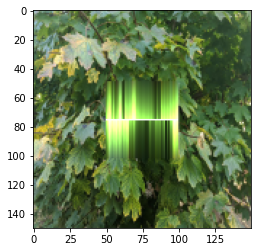

In [1134]:
fill = []
#Top half of square
for i in range(25):
    startI = i + 50
    row = []
    for j in range(50):
        startJ = j + 50
        
        #Finding value of red based on rgb of above pixel
        redFromRed = ((image2[startI-1:startI,startJ:startJ+1,0] * redWeights[0])[0])[0]
        redFromGreen = ((image2[startI-1:startI,startJ:startJ+1,1] * redWeights[1])[0])[0]
        redFromBlue = ((image2[startI-1:startI,startJ:startJ+1,2] * redWeights[2])[0])[0]
        red = redFromRed + redFromGreen + redFromBlue
        
        #Finding value of green based on rgb of above pixel
        greenFromRed = ((image2[startI-1:startI,startJ:startJ+1,0] * greenWeights[0])[0])[0]
        greenFromGreen = ((image2[startI-1:startI,startJ:startJ+1,1] * greenWeights[1])[0])[0]
        greenFromBlue = ((image2[startI-1:startI,startJ:startJ+1,2] * greenWeights[2])[0])[0]
        green = greenFromRed + greenFromGreen + greenFromBlue
        
        #Finding value of blue based on rgb of above pixel
        blueFromRed = ((image2[startI-1:startI,startJ:startJ+1,0] * blueWeights[0])[0])[0]
        blueFromGreen = ((image2[startI-1:startI,startJ:startJ+1,1] * blueWeights[1])[0])[0]
        blueFromBlue = ((image2[startI-1:startI,startJ:startJ+1,2] * blueWeights[2])[0])[0]
        blue = blueFromRed + blueFromGreen + blueFromBlue
        
        colors = [red, green, blue]
        
        row.append(colors)
    fill.append(row)
    #Adjust the colors on the image
    image2[startI:startI+1,50:100] = row

#Bottom half of square
for i in range(25):
    startI = i + 50
    row = []
    for j in range(50):
        startJ = j + 50
        
        #Finding value of red based on rgb of below pixel
        redFromRed = ((image2[101-i:102-i,startJ:startJ+1,0] * redWeights[0])[0])[0]
        redFromGreen = ((image2[101-i:102-i,startJ:startJ+1,1] * redWeights[1])[0])[0]
        redFromBlue = ((image2[101-i:102-i,startJ:startJ+1,2] * redWeights[2])[0])[0]
        red = redFromRed + redFromGreen + redFromBlue
        
        #Finding value of green based on rgb of below pixel
        greenFromRed = ((image2[101-i:102-i,startJ:startJ+1,0] * greenWeights[0])[0])[0]
        greenFromGreen = ((image2[101-i:102-i,startJ:startJ+1,1] * greenWeights[1])[0])[0]
        greenFromBlue = ((image2[101-i:102-i,startJ:startJ+1,2] * greenWeights[2])[0])[0]
        green = greenFromRed + greenFromGreen + greenFromBlue
        
        #Finding value of blue based on rgb of below pixel
        blueFromRed = ((image2[101-i:102-i,startJ:startJ+1,0] * blueWeights[0])[0])[0]
        blueFromGreen = ((image2[101-i:102-i,startJ:startJ+1,1] * blueWeights[1])[0])[0]
        blueFromBlue = ((image2[101-i:102-i,startJ:startJ+1,2] * blueWeights[2])[0])[0]
        blue = blueFromRed + blueFromGreen + blueFromBlue
        
        colors = [red, green, blue]
        
        row.append(colors)
    
    fill.append(row)
    #Adjust the colors on the image
    image2[100-i:101-i,50:100] = row
    
fill = np.array(fill)
fill = fill.astype(int)
plt.imshow(image2)

## Decision Tree

**Lowering the Number of Pixels in the Image**

In [1135]:
image3 = []
#Lowering the number of rows by a factor of 10
for i in range(91):
    row = []
    if i == 0:
        continue
    #Lowering the number of columns by a factor of 10
    for j in range(91):
        if j == 0:
            continue
        #Setting each color as average of 100 pixel region
        red = np.mean(img[(10*(i-1)):10*i,(10*(j-1)):10*j,0])
        green = np.mean(img[(10*(i-1)):10*i,(10*(j-1)):10*j,1])
        blue = np.mean(img[(10*(i-1)):10*i,(10*(j-1)):10*j,2])
        colors = [red,green,blue]
        row.append(colors)

    image3.append(row)

image3 = np.array(image3)


**Making the training data**

In [1136]:
neuralX2 = []
#Each Y color in separate model
neuralYred2 = []
neuralYgreen2 = []
neuralYblue2 = []
#Training Data does not include top squares
for i in range(90):
    if i <= 30:
        continue
    for j in range(90):
        if j == 0:
            continue
        
        #Training data does not include middle square
        if i >= 30 and i <= 61 and j >= 30 and j <= 61:
            continue
        
        #Dividing by 255 so that neural network functions more easily. To be adjusted later
        redX2 = image3[i,j,0]/255
        greenX2 = image3[i,j,1]/255
        blueX2 = image3[i,j,2]/255
        colorsX2 = [redX2,greenX2,blueX2]
        
        #Y values are from the row above the X values
        redY2 = image3[i-1,j,0]/255
        greenY2 = image3[i-1,j,1]/255
        blueY2 = image3[i-1,j,2]/255
        
        #Add the values to X and Y values
        neuralX2.append(colorsX2)
        
        neuralYred2.append(redY2)
        neuralYgreen2.append(greenY2)
        neuralYblue2.append(blueY2)


**Variance of X**

In [1137]:
def variance_X(r,X,data):
    v1 = 0
    v2 = 0
    for i in range(r):
        v1 = v1 + math.pow(data[i][X],2)
    v1 = v1/r
    for i in range(r):
        v2 = v2 + data[i][X]
    v2 = v2/r
    v2 = math.pow(v2,2)
    var = v1-v2
    return (var)

**Variance of Y**

In [1138]:
def variance_Y(r,data):
    v1 = 0
    v2 = 0
    for i in range(r):
        v1 = v1 + math.pow(data[i],2)
    v1 = v1/r
    for i in range(r):
        v2 = v2 + data[i]
    v2 = v2/r
    v2 = math.pow(v2,2)
    var = v1-v2
    return (var)

**Covariance**

In [1139]:
def covariance(r,X,dataY,dataX):
    v = 0
    x = 0
    y = 0
    for i in range(r):
        v = v + (dataX[i][X] * dataY[i])
    v = v/r
    for i in range(r):
        x = x + dataX[i][X]
    x = x/r
    for i in range(r):
        y = y + dataY[i]
    y = y/r
    covar = v - (x*y)
    return(covar)

**Correlation Coeffiecient**

In [1140]:
def corr(r,X,dataY,dataX):
    cov = covariance(r,X,dataY,dataX)
    vX = variance_X(r,X,dataX)
    vY = variance_Y(r,dataY)
    if vX == 0:
        return np.nan
    else:
        corr = (cov)/np.sqrt(vX * vY)
        return(corr)

**Finding ErrorLeft and ErrorRight**

In [1141]:
def find_sideerror(array):
    mean = np.mean(array)
    sum = 0
    for i in range(len(array)):
        sum = sum + math.pow((array[i]-mean),2)
    return sum

**Find Total Error**

In [1142]:
def find_error(midpoint, array, Y,x):
    left = []
    right = []
    for i in range(len(array)):
        if array[i,x] > midpoint:
            right.append(Y[i])
        elif array[i,x] <= midpoint:
            left.append(Y[i])
    leftError = find_sideerror(left)
    rightError = find_sideerror(right)
    Lerror = (len(left)/len(array)) * leftError
    Rerror = (len(right)/len(array)) * rightError
    error = Lerror + Rerror
    return error

**Find Alpha**

In [1143]:
def find_alpha(array,x,size,Y):
    array = np.array(array)
    newArray = array[np.argsort(array[:,x])]
    j = 0
    k = 1
    errors = []
    
    while k < size:
        midpoint = (newArray[j,x] + newArray[k,x])/2
        err = find_error(midpoint,array,Y,x)
        errors.append(err)
        if err == min(errors):
            alpha = j
        j = j+1
        k = k+1
    return newArray[alpha,x]

**Decision Tree**

In [1144]:
def decision(array,Y,averageYs,lowers,uppers,Xs):
    array = np.array(array)
    Y = np.array(Y)
    #Make sure that the size of the recursion doesnt go below 500
    if len(array) <= 500:
        return 
    else:
        #Test which color most correlated
        corrs = []
        for i in range(3):
            correl = corr(len(array),i,Y,array)
            corrs.append(abs(correl))

        X_index = np.nanargmax(corrs)

        #Find the alpha of the most correlated color
        alpha = find_alpha(array,X_index,len(array),Y)
        
        #Record the lower and upper bounds, as well as average of current subset
        lower = min(array[:,X_index])
        upper = max(array[:,X_index])
        averageY = np.mean(Y)
        
        averageYs.append(averageY)
        lowers.append(lower)
        uppers.append(upper)
        #Record which feature is being used
        Xs.append(int(X_index))
        
        leftArray = []
        leftY = []
        rightArray = []
        rightY = []
        
        #Go forward in recursion by splitting into left and right halves
        for j in range(len(array)):

            if array[j,X_index] > alpha:
                rightArray.append(array[j,:])
                rightY.append(Y[j])
            elif  array[j,X_index] <= alpha:
                leftArray.append(array[j,:])
                leftY.append(Y[j])
        
        decision(rightArray,rightY,averageYs,lowers,uppers,Xs)
        decision(leftArray,leftY,averageYs,lowers,uppers,Xs)
        
    return averageYs,lowers,uppers,Xs

**Making the Decision Tree for red**

In [1145]:
neuralX2 = np.array(neuralX2)
neuralYred2 = np.array(neuralYred2)

averageYsRed = []
lowersRed = []
uppersRed = []
XsRed = []

averageYsRed,lowersRed,uppersRed,XsRed = decision(neuralX2,neuralYred2,averageYsRed,lowersRed,uppersRed,XsRed)

averageYsRed = np.array(averageYsRed)
lowersRed = np.array(lowersRed)
uppersRed = np.array(uppersRed)
XsRed = np.array(XsRed)

#Record all values into one array for ease of use
multiRed = []
for i in range(len(averageYsRed)):
    multiRed.append([averageYsRed[i],lowersRed[i],uppersRed[i],XsRed[i]])

**Making the Decision Tree for green**

In [1146]:
neuralX2 = np.array(neuralX2)
neuralYgreen2 = np.array(neuralYgreen2)

averageYsGreen = []
lowersGreen = []
uppersGreen = []
XsGreen = []

averageYsGreen,lowersGreen,uppersGreen,XsGreen = decision(neuralX2,neuralYgreen2,averageYsGreen,lowersGreen,uppersGreen,XsGreen)

averageYsGreen = np.array(averageYsGreen)
lowersGreen = np.array(lowersGreen)
uppersGreen = np.array(uppersGreen)
XsGreen = np.array(XsGreen)

#Record all values into one array for ease of use
multiGreen = []
for i in range(len(averageYsGreen)):
    multiGreen.append([averageYsGreen[i],lowersGreen[i],uppersGreen[i],XsGreen[i]])

**Making the Decision Tree for blue**

In [1147]:
neuralX2 = np.array(neuralX2)
neuralYblue2 = np.array(neuralYblue2)

averageYsBlue = []
lowersBlue = []
uppersBlue = []
XsBlue = []

averageYsBlue,lowersBlue,uppersBlue,XsBlue = decision(neuralX2,neuralYblue2,averageYsBlue,lowersBlue,uppersBlue,XsBlue)

averageYsBlue = np.array(averageYsBlue)
lowersBlue = np.array(lowersBlue)
uppersBlue = np.array(uppersBlue)
XsBlue = np.array(XsBlue)

#Record all values into one array for ease of use
multiBlue = []
for i in range(len(averageYsBlue)):
    multiBlue.append([averageYsBlue[i],lowersBlue[i],uppersBlue[i],XsBlue[i]])

**Applying the Model**

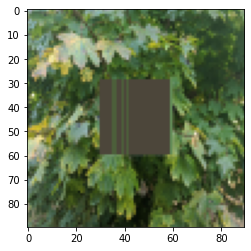

In [1148]:
#Temporarily alter row above white square to be able to use the model
image3[29:30,30:60] = image3[29:30,30:60]/255
for i in range(30):
    row = []
    for j in range(30):
        #Set r based on row above
        for k in range(len(multiRed)):
            if image3[29+i,29+j,multiRed[k][3]] >= multiRed[k][1] and image3[29+i,29+j,multiRed[k][3]] <= multiRed[k][2]:
                image3[29+i,29+j,0] = multiRed[k][0]
        #Set g based on row above
        for k in range(len(multiGreen)):
            if image3[29+i,29+j,multiGreen[k][3]] >= multiGreen[k][1] and image3[29+i,29+j,multiGreen[k][3]] <= multiGreen[k][2]:
                image3[29+i,29+j,1] = multiGreen[k][0]
        #Set b based on row above
        for k in range(len(multiBlue)):
            if image3[29+i,29+j,multiBlue[k][3]] >= multiBlue[k][1] and image3[29+i,29+j,multiBlue[k][3]] <= multiBlue[k][2]:
                image3[29+i,29+j,2] = multiBlue[k][0]

image3[29:60,30:60] = image3[29:30,30:60]*255
image3 = image3.astype(int)
plt.imshow(image3)

# Wood

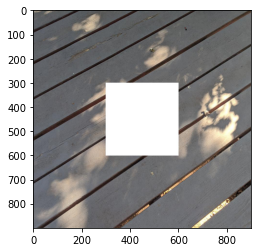

In [1082]:
img = mpimg.imread('Wood_Masked.jpg')
plt.imshow(img)

## Neural Network

**Lowering the Number of Pixels in the Image**

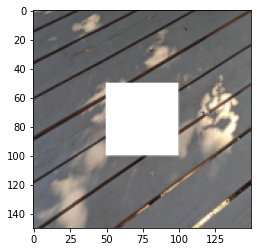

In [1083]:
image = []
image2 = []
#Lowering the number of rows by a factor of 6
for i in range(151):
    row = []
    if i == 0:
        continue
    #Lowering the number of columns by a factor of 6
    for j in range(151):
        if j == 0:
            continue
        
        #Setting each color as average of 36 pixel region
        red = np.mean(img[(6*(i-1)):6*i,(6*(j-1)):6*j,0])
        green = np.mean(img[(6*(i-1)):6*i,(6*(j-1)):6*j,1])
        blue = np.mean(img[(6*(i-1)):6*i,(6*(j-1)):6*j,2])
        colors = [red,green,blue]
        row.append(colors)
    image.append(row)
    image2.append(row)

image = np.array(image)
image = image.astype(int)

image2 = np.array(image2)
image2 = image2.astype(int)

plt.imshow(image)

**Creating the Training Data**

In [1084]:
neuralX = []
#Each Y color in separate model
neuralYred = []
neuralYgreen = []
neuralYblue = []
for i in range(150):
    #Training Data does not include top squares
    if i <= 50:
        continue
    for j in range(150):
        if j == 0:
            continue
        
        #Training data does not include middle square
        if i >= 50 and i <= 101 and j >= 50 and j <= 101:
            continue
        
        #Dividing by 255 so that neural network functions more easily. To be adjusted later
        redX = image[i,j,0]/255
        greenX = image[i,j,1]/255
        blueX = image[i,j,2]/255
        colorsX = [redX,greenX,blueX]
        
        #Y values are from the row above the X values
        redY = [image[i-1,j,0]/255]
        greenY = [image[i-1,j,1]/255]
        blueY = [image[i-1,j,2]/255]
        
        #Add the values to X and Y values
        neuralX.append(colorsX)
        neuralYred.append(redY)
        neuralYgreen.append(greenY)
        neuralYblue.append(blueY)

neuralX = np.array(neuralX)

neuralYred = np.array(neuralYred)
neuralYgreen = np.array(neuralYgreen)
neuralYblue = np.array(neuralYblue)

**Model for red values**

In [1085]:
redWeights = np.random.random((3,1))
print(redWeights)
for i in range(10000):
    #z values
    z = np.dot(neuralX,redWeights)
    #tanh formula
    sig1 = np.exp(z)
    sig2 = np.exp(-z)
    tanh = (sig1 - sig2)/(sig1 + sig2)
    #error
    err = neuralYred - tanh
    #Derivative of tanh
    deriv = tanh * (1 - tanh)
    #Adjust the weights
    mult = err*deriv
    adjust = np.dot(neuralX.T, mult)/12500
    redWeights = redWeights + adjust
    #if weights are out of range, set them to be between 0 and 1
    for j in range(3):
        if redWeights[j] > 1:
            redWeights[j] = 1
        if redWeights[j] < -1:
            redWeights[j] = -1
print(redWeights)

[[0.23563179]
 [0.0267318 ]
 [0.46883755]]
[[ 1.        ]
 [ 0.68595336]
 [-0.57761176]]


**Model for green values**

In [1086]:
greenWeights = np.random.random((3,1))
print(greenWeights)
for i in range(10000):
    #z values
    z = np.dot(neuralX,greenWeights)
    #tanh formula
    sig1 = np.exp(z)
    sig2 = np.exp(-z)
    tanh = (sig1 - sig2)/(sig1 + sig2)
    #error
    err = neuralYgreen - tanh
    #Derivative of tanh
    deriv = tanh * (1 - tanh)
    #Adjust the weights
    mult = err*deriv
    adjust = np.dot(neuralX.T, mult)/12500
    greenWeights = greenWeights + adjust
    #if weights are out of range, set them to be between 0 and 1
    for j in range(3):
        if greenWeights[j] > 1:
            greenWeights[j] = 1
        if greenWeights[j] < -1:
            greenWeights[j] = -1
print(greenWeights)

[[0.65455406]
 [0.92122887]
 [0.66870061]]
[[ 0.63192278]
 [ 0.65170421]
 [-0.20732215]]


**Model for blue values**

In [1087]:
blueWeights = np.random.random((3,1))
print(blueWeights)
for i in range(10000):
    #z values
    z = np.dot(neuralX,blueWeights)
    #tanh formula
    sig1 = np.exp(z)
    sig2 = np.exp(-z)
    tanh = (sig1 - sig2)/(sig1 + sig2)
    #error
    err = neuralYblue - tanh
    #Derivative of tanh
    deriv = tanh * (1 - tanh)
    #Adjust the weights
    mult = err*deriv
    adjust = np.dot(neuralX.T, mult)/12500
    blueWeights = blueWeights + adjust
    #if weights are out of range, set them to be between 0 and 1
    for j in range(3):
        if blueWeights[j] > 1:
            blueWeights[j] = 1
        if blueWeights[j] < -1:
            blueWeights[j] = -1
print(blueWeights)

[[0.32010379]
 [0.13226664]
 [0.06819955]]
[[0.14324551]
 [0.21294782]
 [0.71528861]]


**Applying the Model**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


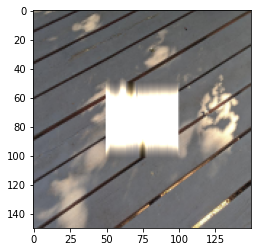

In [1088]:
fill = []
#Top half of square
for i in range(25):
    startI = i + 50
    row = []
    for j in range(50):
        startJ = j + 50
        
        #Finding value of red based on rgb of above pixel
        redFromRed = ((image2[startI-1:startI,startJ:startJ+1,0] * redWeights[0])[0])[0]
        redFromGreen = ((image2[startI-1:startI,startJ:startJ+1,1] * redWeights[1])[0])[0]
        redFromBlue = ((image2[startI-1:startI,startJ:startJ+1,2] * redWeights[2])[0])[0]
        red = redFromRed + redFromGreen + redFromBlue
        
        #Finding value of green based on rgb of above pixel
        greenFromRed = ((image2[startI-1:startI,startJ:startJ+1,0] * greenWeights[0])[0])[0]
        greenFromGreen = ((image2[startI-1:startI,startJ:startJ+1,1] * greenWeights[1])[0])[0]
        greenFromBlue = ((image2[startI-1:startI,startJ:startJ+1,2] * greenWeights[2])[0])[0]
        green = greenFromRed + greenFromGreen + greenFromBlue
        
        #Finding value of blue based on rgb of above pixel
        blueFromRed = ((image2[startI-1:startI,startJ:startJ+1,0] * blueWeights[0])[0])[0]
        blueFromGreen = ((image2[startI-1:startI,startJ:startJ+1,1] * blueWeights[1])[0])[0]
        blueFromBlue = ((image2[startI-1:startI,startJ:startJ+1,2] * blueWeights[2])[0])[0]
        blue = blueFromRed + blueFromGreen + blueFromBlue
        
        colors = [red, green, blue]
        
        row.append(colors)
    fill.append(row)
    #Adjust the colors on the image
    image2[startI:startI+1,50:100] = row

#Bottom half of square
for i in range(25):
    startI = i + 50
    row = []
    for j in range(50):
        startJ = j + 50
        
        #Finding value of red based on rgb of below pixel
        redFromRed = ((image2[101-i:102-i,startJ:startJ+1,0] * redWeights[0])[0])[0]
        redFromGreen = ((image2[101-i:102-i,startJ:startJ+1,1] * redWeights[1])[0])[0]
        redFromBlue = ((image2[101-i:102-i,startJ:startJ+1,2] * redWeights[2])[0])[0]
        red = redFromRed + redFromGreen + redFromBlue
        
        #Finding value of green based on rgb of below pixel
        greenFromRed = ((image2[101-i:102-i,startJ:startJ+1,0] * greenWeights[0])[0])[0]
        greenFromGreen = ((image2[101-i:102-i,startJ:startJ+1,1] * greenWeights[1])[0])[0]
        greenFromBlue = ((image2[101-i:102-i,startJ:startJ+1,2] * greenWeights[2])[0])[0]
        green = greenFromRed + greenFromGreen + greenFromBlue
        
        #Finding value of blue based on rgb of below pixel
        blueFromRed = ((image2[101-i:102-i,startJ:startJ+1,0] * blueWeights[0])[0])[0]
        blueFromGreen = ((image2[101-i:102-i,startJ:startJ+1,1] * blueWeights[1])[0])[0]
        blueFromBlue = ((image2[101-i:102-i,startJ:startJ+1,2] * blueWeights[2])[0])[0]
        blue = blueFromRed + blueFromGreen + blueFromBlue
        
        colors = [red, green, blue]
        
        row.append(colors)
    
    fill.append(row)
    #Adjust the colors on the image
    image2[100-i:101-i,50:100] = row
    
fill = np.array(fill)
fill = fill.astype(int)
plt.imshow(image2)

## Decision Tree

**Lowering the Number of Pixels in the Image**

In [1089]:
image3 = []
#Lowering the number of rows by a factor of 10
for i in range(91):
    row = []
    if i == 0:
        continue
    #Lowering the number of columns by a factor of 10
    for j in range(91):
        if j == 0:
            continue
        #Setting each color as average of 100 pixel region
        red = np.mean(img[(10*(i-1)):10*i,(10*(j-1)):10*j,0])
        green = np.mean(img[(10*(i-1)):10*i,(10*(j-1)):10*j,1])
        blue = np.mean(img[(10*(i-1)):10*i,(10*(j-1)):10*j,2])
        colors = [red,green,blue]
        row.append(colors)

    image3.append(row)

image3 = np.array(image3)


**Making the training data**

In [1090]:
neuralX2 = []
#Each Y color in separate model
neuralYred2 = []
neuralYgreen2 = []
neuralYblue2 = []
#Training Data does not include top squares
for i in range(90):
    if i <= 30:
        continue
    for j in range(90):
        if j == 0:
            continue
        
        #Training data does not include middle square
        if i >= 30 and i <= 61 and j >= 30 and j <= 61:
            continue
        
        #Dividing by 255 so that neural network functions more easily. To be adjusted later
        redX2 = image3[i,j,0]/255
        greenX2 = image3[i,j,1]/255
        blueX2 = image3[i,j,2]/255
        colorsX2 = [redX2,greenX2,blueX2]
        
        #Y values are from the row above the X values
        redY2 = image3[i-1,j,0]/255
        greenY2 = image3[i-1,j,1]/255
        blueY2 = image3[i-1,j,2]/255
        
        #Add the values to X and Y values
        neuralX2.append(colorsX2)
        
        neuralYred2.append(redY2)
        neuralYgreen2.append(greenY2)
        neuralYblue2.append(blueY2)


**Variance of X**

In [1091]:
def variance_X(r,X,data):
    v1 = 0
    v2 = 0
    for i in range(r):
        v1 = v1 + math.pow(data[i][X],2)
    v1 = v1/r
    for i in range(r):
        v2 = v2 + data[i][X]
    v2 = v2/r
    v2 = math.pow(v2,2)
    var = v1-v2
    return (var)

**Variance of Y**

In [1092]:
def variance_Y(r,data):
    v1 = 0
    v2 = 0
    for i in range(r):
        v1 = v1 + math.pow(data[i],2)
    v1 = v1/r
    for i in range(r):
        v2 = v2 + data[i]
    v2 = v2/r
    v2 = math.pow(v2,2)
    var = v1-v2
    return (var)

**Covariance**

In [1093]:
def covariance(r,X,dataY,dataX):
    v = 0
    x = 0
    y = 0
    for i in range(r):
        v = v + (dataX[i][X] * dataY[i])
    v = v/r
    for i in range(r):
        x = x + dataX[i][X]
    x = x/r
    for i in range(r):
        y = y + dataY[i]
    y = y/r
    covar = v - (x*y)
    return(covar)

**Correlation Coeffiecient**

In [1094]:
def corr(r,X,dataY,dataX):
    cov = covariance(r,X,dataY,dataX)
    vX = variance_X(r,X,dataX)
    vY = variance_Y(r,dataY)
    if vX == 0:
        return np.nan
    else:
        corr = (cov)/np.sqrt(vX * vY)
        return(corr)

**Finding ErrorLeft and ErrorRight**

In [1095]:
def find_sideerror(array):
    mean = np.mean(array)
    sum = 0
    for i in range(len(array)):
        sum = sum + math.pow((array[i]-mean),2)
    return sum

**Find Total Error**

In [1096]:
def find_error(midpoint, array, Y,x):
    left = []
    right = []
    for i in range(len(array)):
        if array[i,x] > midpoint:
            right.append(Y[i])
        elif array[i,x] <= midpoint:
            left.append(Y[i])
    leftError = find_sideerror(left)
    rightError = find_sideerror(right)
    Lerror = (len(left)/len(array)) * leftError
    Rerror = (len(right)/len(array)) * rightError
    error = Lerror + Rerror
    return error

**Find Alpha**

In [1097]:
def find_alpha(array,x,size,Y):
    array = np.array(array)
    newArray = array[np.argsort(array[:,x])]
    j = 0
    k = 1
    errors = []
    
    while k < size:
        midpoint = (newArray[j,x] + newArray[k,x])/2
        err = find_error(midpoint,array,Y,x)
        errors.append(err)
        if err == min(errors):
            alpha = j
        j = j+1
        k = k+1
    return newArray[alpha,x]

**Decision Tree**

In [1098]:
def decision(array,Y,averageYs,lowers,uppers,Xs):
    array = np.array(array)
    Y = np.array(Y)
    #Make sure that the size of the recursion doesnt go below 500
    if len(array) <= 500:
        return 
    else:
        #Test which color most correlated
        corrs = []
        for i in range(3):
            correl = corr(len(array),i,Y,array)
            corrs.append(abs(correl))

        X_index = np.nanargmax(corrs)

        #Find the alpha of the most correlated color
        alpha = find_alpha(array,X_index,len(array),Y)
        
        #Record the lower and upper bounds, as well as average of current subset
        lower = min(array[:,X_index])
        upper = max(array[:,X_index])
        averageY = np.mean(Y)
        
        averageYs.append(averageY)
        lowers.append(lower)
        uppers.append(upper)
        #Record which feature is being used
        Xs.append(int(X_index))
        
        leftArray = []
        leftY = []
        rightArray = []
        rightY = []
        
        #Go forward in recursion by splitting into left and right halves
        for j in range(len(array)):

            if array[j,X_index] > alpha:
                rightArray.append(array[j,:])
                rightY.append(Y[j])
            elif  array[j,X_index] <= alpha:
                leftArray.append(array[j,:])
                leftY.append(Y[j])
        
        decision(rightArray,rightY,averageYs,lowers,uppers,Xs)
        decision(leftArray,leftY,averageYs,lowers,uppers,Xs)
        
    return averageYs,lowers,uppers,Xs

**Making the Decision Tree for red**

In [1099]:
neuralX2 = np.array(neuralX2)
neuralYred2 = np.array(neuralYred2)

averageYsRed = []
lowersRed = []
uppersRed = []
XsRed = []

averageYsRed,lowersRed,uppersRed,XsRed = decision(neuralX2,neuralYred2,averageYsRed,lowersRed,uppersRed,XsRed)

averageYsRed = np.array(averageYsRed)
lowersRed = np.array(lowersRed)
uppersRed = np.array(uppersRed)
XsRed = np.array(XsRed)

#Record all values into one array for ease of use
multiRed = []
for i in range(len(averageYsRed)):
    multiRed.append([averageYsRed[i],lowersRed[i],uppersRed[i],XsRed[i]])

**Making the Decision Tree for green**

In [1100]:
neuralX2 = np.array(neuralX2)
neuralYgreen2 = np.array(neuralYgreen2)

averageYsGreen = []
lowersGreen = []
uppersGreen = []
XsGreen = []

averageYsGreen,lowersGreen,uppersGreen,XsGreen = decision(neuralX2,neuralYgreen2,averageYsGreen,lowersGreen,uppersGreen,XsGreen)

averageYsGreen = np.array(averageYsGreen)
lowersGreen = np.array(lowersGreen)
uppersGreen = np.array(uppersGreen)
XsGreen = np.array(XsGreen)

#Record all values into one array for ease of use
multiGreen = []
for i in range(len(averageYsGreen)):
    multiGreen.append([averageYsGreen[i],lowersGreen[i],uppersGreen[i],XsGreen[i]])

**Making the Decision Tree for blue**

In [1101]:
neuralX2 = np.array(neuralX2)
neuralYblue2 = np.array(neuralYblue2)

averageYsBlue = []
lowersBlue = []
uppersBlue = []
XsBlue = []

averageYsBlue,lowersBlue,uppersBlue,XsBlue = decision(neuralX2,neuralYblue2,averageYsBlue,lowersBlue,uppersBlue,XsBlue)

averageYsBlue = np.array(averageYsBlue)
lowersBlue = np.array(lowersBlue)
uppersBlue = np.array(uppersBlue)
XsBlue = np.array(XsBlue)

#Record all values into one array for ease of use
multiBlue = []
for i in range(len(averageYsBlue)):
    multiBlue.append([averageYsBlue[i],lowersBlue[i],uppersBlue[i],XsBlue[i]])

**Applying the Model**

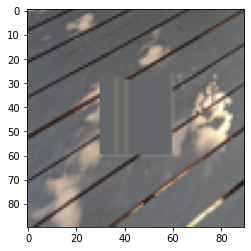

In [1102]:
#Temporarily alter row above white square to be able to use the model
image3[29:30,30:60] = image3[29:30,30:60]/255
for i in range(30):
    row = []
    for j in range(30):
        #Set r based on row above
        for k in range(len(multiRed)):
            if image3[29+i,29+j,multiRed[k][3]] >= multiRed[k][1] and image3[29+i,29+j,multiRed[k][3]] <= multiRed[k][2]:
                image3[29+i,29+j,0] = multiRed[k][0]
        #Set g based on row above
        for k in range(len(multiGreen)):
            if image3[29+i,29+j,multiGreen[k][3]] >= multiGreen[k][1] and image3[29+i,29+j,multiGreen[k][3]] <= multiGreen[k][2]:
                image3[29+i,29+j,1] = multiGreen[k][0]
        #Set b based on row above
        for k in range(len(multiBlue)):
            if image3[29+i,29+j,multiBlue[k][3]] >= multiBlue[k][1] and image3[29+i,29+j,multiBlue[k][3]] <= multiBlue[k][2]:
                image3[29+i,29+j,2] = multiBlue[k][0]

image3[29:60,30:60] = image3[29:30,30:60]*255
image3 = image3.astype(int)
plt.imshow(image3)